# Assignment 2 - Machine learning and modeling
In this assignment, you work in the same groups you already are divided into. You need to define at least one task based on each of the exercises 4, 5 and 10. All together three tasks. You have to apply the tasks on the same dataset that you used in Assignment 1. 

You will hand in the assignment through a Jupyter notebook, along with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on April 26, 2025 to get bonus points, or before the exam (in which case no bonus points will be awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

# Exercice 4
The tasks are
- Regression
- Clustering
- Decision Trees and Model validation
- SVMs, Hyperparameters, and Cross-Validation

# Exercice 5
The tasks are:
- Permutation feature importance
- Statistical testing
- Dimensionality reduction


## Import and dataset

In [2]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
df = pd.read_csv("../Total air emissions by greenhouse gas.csv")
df

,greenhouse gas,sector,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,...,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
1,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,...,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
2,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,...,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
3,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,...,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
4,Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,...,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"INTERNATIONAL TRANSPORT, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
150,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"AGRICULTURE, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
151,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"SOLVENT USE AND OTHER PRODUCT USE, TOTAL",81.4,81.6,81.4,78.1,82.2,111.0,87.5,121.3,...,31.1,37.0,38.8,34.0,34.0,35.3,38.2,39.6,38.6,38.0
152,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"HEATING OF HOUSES AND PREMISES, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## Regression

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[71203.3, 71338.8, 71022.5, 71242.7, 73749.3, 73135.2, 77030.2, 72145.4, 72526.6, 69370.9, 68131.8, 68886.2, 69501.1, 69812.4, 69132.8, 66251.5, 65901.0, 64741.8, 62344.5, 58122.7, 64123.2, 59742.6, 56829.5, 55209.9, 53481.9, 53283.7, 53198.3, 52294.3, 51434.3, 50196.4, 45981.9, 47721.8, 45215.4, 44386.0]


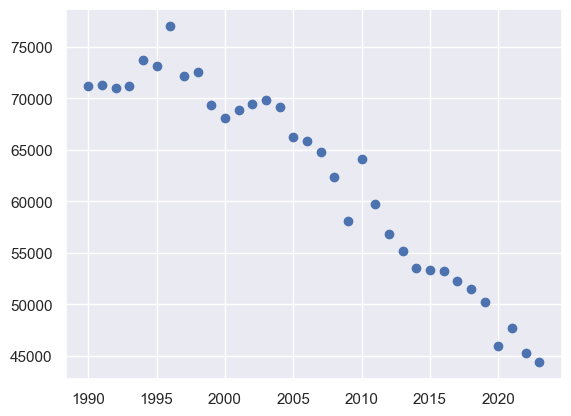

In [5]:
# get x axis, column
col = df.columns
col = col[2:]
x = [int(x) for x in col]
print(x)

# get y axis, first row value
first_row = df.iloc[0].tolist()
first_row = first_row[2:]
y = [float(x) for x in first_row]
print(y)

plt.scatter(x, y)
plt.show()

### Linear regression

Coefficient: [[-929.19854851]]
Intercept: [1926751.29640947]


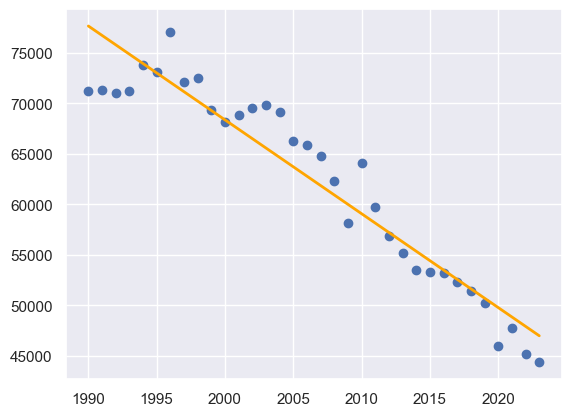

In [6]:
from sklearn.linear_model import LinearRegression

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

yfit = model.predict(x)
plt.scatter(x, y)
plt.plot(x, yfit, color='orange', lw=2)
plt.show()

### Polynomial regression

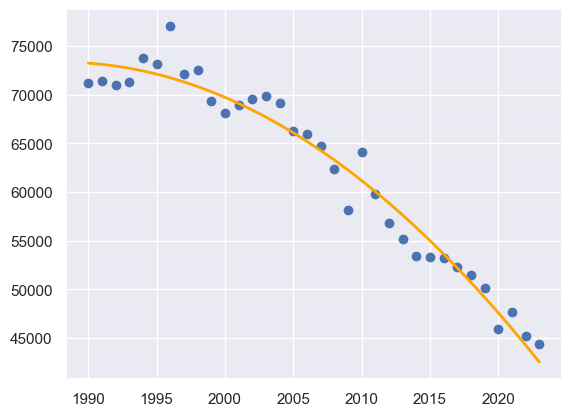

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial 2 cause i don't think more is needed
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(x, y)

yfit = poly_model.predict(x)

plt.scatter(x, y)
plt.plot(x, yfit, color='orange', lw=2)


## Clustering


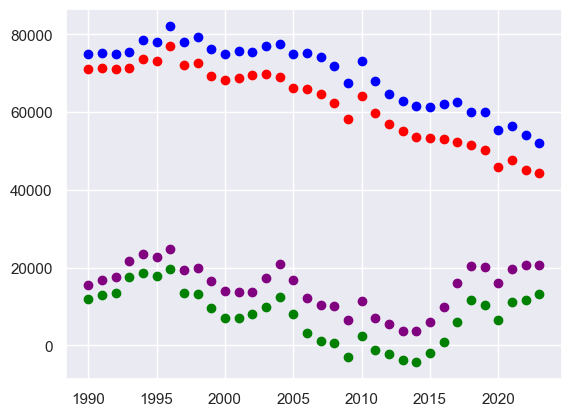

In [8]:
# get more rows, the first 4
def get_row(i):
    row = df.iloc[i].tolist()
    row = row[2:]                       # remove first 2 col
    convert = [float(x) for x in row]   # convert to float
    return np.array(convert).reshape(-1, 1)

y_0 = get_row(0)
y_1 = get_row(1)
y_2 = get_row(2)
y_3 = get_row(3)

plt.scatter(x, y_0, color='red')
plt.scatter(x, y_1, color='blue')
plt.scatter(x, y_2, color='green')
plt.scatter(x, y_3, color='purple')
plt.show()

### K Mean

In [9]:
X = []
Y = []
for index, y in enumerate([y_0, y_1, y_2, y_3]):
    X.append(np.column_stack((x, y)))
    Y.extend([index for _ in range(len(y))])

X = np.concatenate(X, axis=0)
Y = np.array(Y)
print(X)
print(Y)

[[ 1990.  71203.3]
 [ 1991.  71338.8]
 [ 1992.  71022.5]
 [ 1993.  71242.7]
 [ 1994.  73749.3]
 [ 1995.  73135.2]
 [ 1996.  77030.2]
 [ 1997.  72145.4]
 [ 1998.  72526.6]
 [ 1999.  69370.9]
 [ 2000.  68131.8]
 [ 2001.  68886.2]
 [ 2002.  69501.1]
 [ 2003.  69812.4]
 [ 2004.  69132.8]
 [ 2005.  66251.5]
 [ 2006.  65901. ]
 [ 2007.  64741.8]
 [ 2008.  62344.5]
 [ 2009.  58122.7]
 [ 2010.  64123.2]
 [ 2011.  59742.6]
 [ 2012.  56829.5]
 [ 2013.  55209.9]
 [ 2014.  53481.9]
 [ 2015.  53283.7]
 [ 2016.  53198.3]
 [ 2017.  52294.3]
 [ 2018.  51434.3]
 [ 2019.  50196.4]
 [ 2020.  45981.9]
 [ 2021.  47721.8]
 [ 2022.  45215.4]
 [ 2023.  44386. ]
 [ 1990.  74942.3]
 [ 1991.  75103.8]
 [ 1992.  74935.1]
 [ 1993.  75408.3]
 [ 1994.  78554. ]
 [ 1995.  78019.4]
 [ 1996.  82142.9]
 [ 1997.  78075.2]
 [ 1998.  79334.1]
 [ 1999.  76342.5]
 [ 2000.  75005.4]
 [ 2001.  75591.9]
 [ 2002.  75361.1]
 [ 2003.  77114. ]
 [ 2004.  77559.7]
 [ 2005.  74960.6]
 [ 2006.  75120.3]
 [ 2007.  74083.1]
 [ 2008.  71

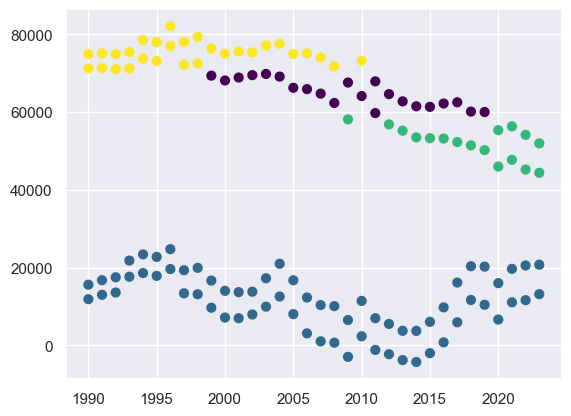

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=1)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### Gaussian Mixture Model (GMM)

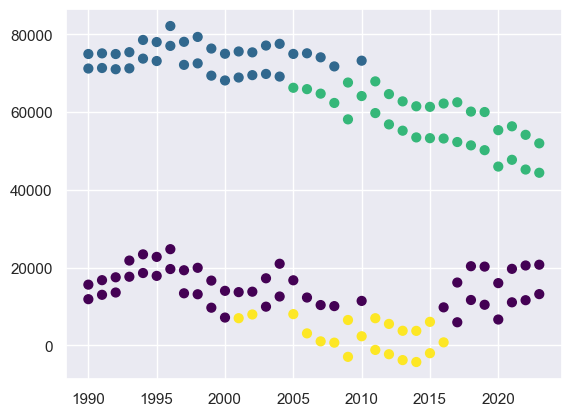

In [11]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4, random_state=0)
labels = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### Run GMM several times

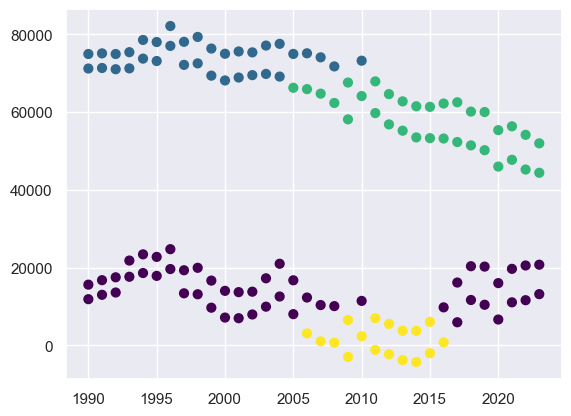

In [12]:
gmm = GMM(n_components=4, n_init=10)
labels = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

As we can see it's not very good to get cluster from time series

## Decision tree
### Split the data

In [13]:
from sklearn.model_selection import train_test_split

print(X)
print(Y)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8
)

[[ 1990.  71203.3]
 [ 1991.  71338.8]
 [ 1992.  71022.5]
 [ 1993.  71242.7]
 [ 1994.  73749.3]
 [ 1995.  73135.2]
 [ 1996.  77030.2]
 [ 1997.  72145.4]
 [ 1998.  72526.6]
 [ 1999.  69370.9]
 [ 2000.  68131.8]
 [ 2001.  68886.2]
 [ 2002.  69501.1]
 [ 2003.  69812.4]
 [ 2004.  69132.8]
 [ 2005.  66251.5]
 [ 2006.  65901. ]
 [ 2007.  64741.8]
 [ 2008.  62344.5]
 [ 2009.  58122.7]
 [ 2010.  64123.2]
 [ 2011.  59742.6]
 [ 2012.  56829.5]
 [ 2013.  55209.9]
 [ 2014.  53481.9]
 [ 2015.  53283.7]
 [ 2016.  53198.3]
 [ 2017.  52294.3]
 [ 2018.  51434.3]
 [ 2019.  50196.4]
 [ 2020.  45981.9]
 [ 2021.  47721.8]
 [ 2022.  45215.4]
 [ 2023.  44386. ]
 [ 1990.  74942.3]
 [ 1991.  75103.8]
 [ 1992.  74935.1]
 [ 1993.  75408.3]
 [ 1994.  78554. ]
 [ 1995.  78019.4]
 [ 1996.  82142.9]
 [ 1997.  78075.2]
 [ 1998.  79334.1]
 [ 1999.  76342.5]
 [ 2000.  75005.4]
 [ 2001.  75591.9]
 [ 2002.  75361.1]
 [ 2003.  77114. ]
 [ 2004.  77559.7]
 [ 2005.  74960.6]
 [ 2006.  75120.3]
 [ 2007.  74083.1]
 [ 2008.  71

### Create and train the decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_pred

array([2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 0, 3, 1, 1, 0])

### Evaluate the decision tree performance

In [15]:
from sklearn.metrics import f1_score, accuracy_score

print("Absolute error:", (y_test != y_pred).sum())
print("Accuracy:", accuracy_score(y_test, y_pred))

print("F1-scores (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1-scores (weighted):", f1_score(y_test, y_pred, average='weighted'))

Absolute error: 2
Accuracy: 0.9285714285714286
F1-scores (macro): 0.9270833333333334
F1-scores (weighted): 0.9285714285714286


### Plot a confusion matrix

Text(110.44999999999997, 0.5, 'predicted label')

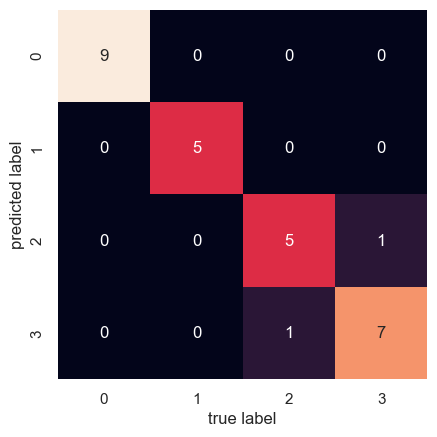

In [16]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Plot the decision tree

[Text(0.4782608695652174, 0.9285714285714286, 'x[1] <= 34557.3\ngini = 0.749\nsamples = 108\nvalue = [25.0, 29.0, 28.0, 26.0]'),
 Text(0.21739130434782608, 0.7857142857142857, 'x[1] <= 13684.45\ngini = 0.499\nsamples = 54\nvalue = [0, 0, 28, 26]'),
 Text(0.34782608695652173, 0.8571428571428572, 'True  '),
 Text(0.08695652173913043, 0.6428571428571429, 'x[1] <= 3389.85\ngini = 0.382\nsamples = 35\nvalue = [0, 0, 26, 9]'),
 Text(0.043478260869565216, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]'),
 Text(0.13043478260869565, 0.5, 'x[0] <= 2005.5\ngini = 0.469\nsamples = 24\nvalue = [0, 0, 15, 9]'),
 Text(0.08695652173913043, 0.35714285714285715, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(0.17391304347826086, 0.35714285714285715, 'x[0] <= 2016.5\ngini = 0.48\nsamples = 15\nvalue = [0, 0, 6, 9]'),
 Text(0.13043478260869565, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9]'),
 Text(0.21739130434782608, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nva

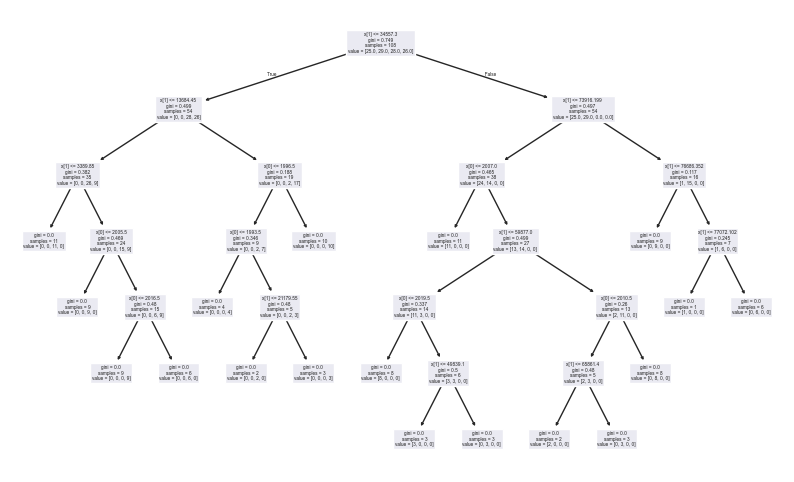

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(tree)

it's bigger than i thought so why not reduce it and retest it ? maybe it will be better to generalize.

Absolute error: 5
Accuracy: 0.8214285714285714
F1-scores (macro): 0.8035087719298245
F1-scores (weighted): 0.8140350877192982


[Text(0.5, 0.9, 'x[1] <= 34557.3\ngini = 0.749\nsamples = 108\nvalue = [25.0, 29.0, 28.0, 26.0]'),
 Text(0.2631578947368421, 0.7, 'x[1] <= 13684.45\ngini = 0.499\nsamples = 54\nvalue = [0, 0, 28, 26]'),
 Text(0.381578947368421, 0.8, 'True  '),
 Text(0.10526315789473684, 0.5, 'x[1] <= 3389.85\ngini = 0.382\nsamples = 35\nvalue = [0, 0, 26, 9]'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]'),
 Text(0.15789473684210525, 0.3, 'x[0] <= 2005.5\ngini = 0.469\nsamples = 24\nvalue = [0, 0, 15, 9]'),
 Text(0.10526315789473684, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(0.21052631578947367, 0.1, 'gini = 0.48\nsamples = 15\nvalue = [0, 0, 6, 9]'),
 Text(0.42105263157894735, 0.5, 'x[0] <= 1996.5\ngini = 0.188\nsamples = 19\nvalue = [0, 0, 2, 17]'),
 Text(0.3684210526315789, 0.3, 'x[1] <= 20708.5\ngini = 0.346\nsamples = 9\nvalue = [0, 0, 2, 7]'),
 Text(0.3157894736842105, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [0, 0, 2, 3]'),
 Text(0.421052631

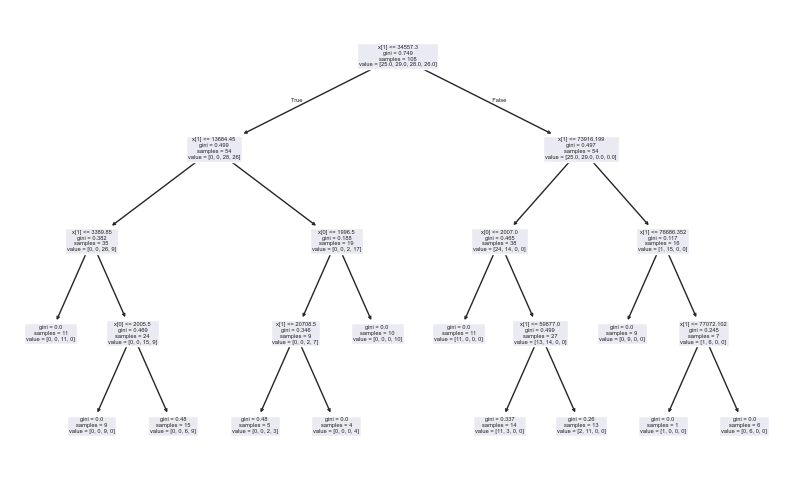

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Change the max depth to 4, we see on the figure above the depth is 6 with no pre-pruning
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

y_pred = tree.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score

print("Absolute error:", (y_test != y_pred).sum())
print("Accuracy:", accuracy_score(y_test, y_pred))

print("F1-scores (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1-scores (weighted):", f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plot_tree(tree)

Nope, reducing the max depth doesn't improve the performance in our case.

## SVM

In [19]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.6428571428571429


### Perform 10 fold validation

In [20]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1.0)

scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')

In [21]:
print("Scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Scores for each fold: [0.71428571 0.57142857 0.85714286 0.71428571 0.71428571 0.78571429
 0.76923077 1.         0.61538462 0.53846154]
Average accuracy: 0.7280219780219779


### Perform hyper parameter tuning

In [22]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [1, 10, 100],
#               'kernel': ['linear', 'rbf'],
#               }

# grid = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=8) # n jobs because it's still running after 3 hours
# grid.fit(X, Y)
# grid.best_params_

KeyboardInterrupt: 

### Try the SVM with the best hyperparam

In [ ]:
# model = SVC(**grid.best_params_)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))